In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer

In [3]:
train_data = pd.read_csv("./dataset/train.csv")
pd.set_option('display.max_colwidth', None)  # Show full text
train_data.head(2)

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,"By . Associated Press . PUBLISHED: . 14:11 EST, 25 October 2013 . | . UPDATED: . 15:36 EST, 25 October 2013 . The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A virus in late September and early October. The state Health Department has issued an advisory of exposure for anyone who attended five churches and took communion. Bishop John Folda (pictured) of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A . State Immunization Program Manager Molly Howell says the risk is low, but officials feel it's important to alert people to the possible exposure. The diocese announced on Monday that Bishop John Folda is taking time off after being diagnosed with hepatitis A. The diocese says he contracted the infection through contaminated food while attending a conference for newly ordained bishops in Italy last month. Symptoms of hepatitis A include fever, tiredness, loss of appetite, nausea and abdominal discomfort. Fargo Catholic Diocese in North Dakota (pictured) is where the bishop is located .","Bishop John Folda, of North Dakota, is taking time off after being diagnosed .\nHe contracted the infection through contaminated food in Italy .\nChurch members in Fargo, Grand Forks and Jamestown could have been exposed ."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,"(CNN) -- Ralph Mata was an internal affairs lieutenant for the Miami-Dade Police Department, working in the division that investigates allegations of wrongdoing by cops. Outside the office, authorities allege that the 45-year-old longtime officer worked with a drug trafficking organization to help plan a murder plot and get guns. A criminal complaint unsealed in U.S. District Court in New Jersey Tuesday accuses Mata, also known as ""The Milk Man,"" of using his role as a police officer to help the drug trafficking organization in exchange for money and gifts, including a Rolex watch. In one instance, the complaint alleges, Mata arranged to pay two assassins to kill rival drug dealers. The killers would pose as cops, pulling over their targets before shooting them, according to the complaint. ""Ultimately, the (organization) decided not to move forward with the murder plot, but Mata still received a payment for setting up the meetings,"" federal prosecutors said in a statement. The complaint also alleges that Mata used his police badge to purchase weapons for drug traffickers. Mata, according to the complaint, then used contacts at the airport to transport the weapons in his carry-on luggage on trips from Miami to the Dominican Republic. Court documents released by investigators do not specify the name of the drug trafficking organization with which Mata allegedly conspired but says the organization has been importing narcotics from places such as Ecuador and the Dominican Republic by hiding them ""inside shipping containers containing pallets of produce, including bananas."" The organization ""has been distributing narcotics in New Jersey and elsewhere,"" the complaint says. Authorities arrested Mata on Tuesday in Miami Gardens, Florida. It was not immediately clear whether Mata has an attorney, and police officials could not be immediately reached for comment. Mata has worked for the Miami-Dade Police Department since 1992, including directing investigations in Miami Gardens and working as a lieutenant in the K-9 unit at Miami International Airport, according to the complaint. Since March 2010, he had been working in the internal affairs division. Mata faces charges of aiding and abetting a conspiracy to distribute cocaine, conspiring to distribute cocaine and engaging in monetary transactions in property derived from specified unlawful activity. He is scheduled to appear in federal court in Florida on Wedn

In [4]:
validation_data = pd.read_csv("./dataset/validation.csv")
pd.set_option('display.max_colwidth', None)  # Show full text
validation_data.head(1)

,id,article,highlights
0,61df4979ac5fcc2b71be46ed6fe5a46ce7f071c3,"Sally Forrest, an actress-dancer who graced the silver screen throughout the '40s and '50s in MGM musicals and films such as the 1956 noir While the City Sleeps died on March 15 at her home in Beverly Hills, California. Forrest, whose birth name was Katherine Feeney, was 86 and had long battled cancer. Her publicist, Judith Goffin, announced the news Thursday. Scroll down for video . Actress: Sally Forrest was in the 1951 Ida Lupino-directed film 'Hard, Fast and Beautiful' (left) and the 1956 Fritz Lang movie 'While the City Sleeps' A San Diego native, Forrest became a protege of Hollywood trailblazer Ida Lupino, who cast her in starring roles in films including the critical and commercial success Not Wanted, Never Fear and Hard, Fast and Beautiful. Some of Forrest's other film credits included Bannerline, Son of Sinbad, and Excuse My Dust, according to her iMDB page. The page also indicates Forrest was in multiple Climax! and Rawhide television episodes. Forrest appeared as herself in an episode of The Ed Sullivan Show and three episodes of The Dinah Shore Chevy Show, her iMDB page says. She also starred in a Broadway production of The Seven Year Itch. City News Service reported that other stage credits included As You Like It, No, No, Nanette and Damn Yankees. Forrest married writer-producer Milo Frank in 1951. He died in 2004. She is survived by her niece, Sharon Durham, and nephews, Michael and Mark Feeney. Career: A San Diego native, Forrest became a protege of Hollywood trailblazer Ida Lupino, who cast her in starring roles in films .","Sally Forrest, an actress-dancer who graced the silver screen throughout the '40s and '50s in MGM musicals and films died on March 15 .\nForrest, whose birth name was Katherine Feeney, had long battled cancer .\nA San Diego native, Forrest became a protege of Hollywood trailblazer Ida Lupino, who cast her in starring roles in films ."


In [5]:
test_data = pd.read_csv("./dataset/test.csv")
pd.set_option('display.max_colwidth', None)  # Show full text
test_data.head(1)

,id,article,highlights
0,92c514c913c0bdfe25341af9fd72b29db544099b,"Ever noticed how plane seats appear to be getting smaller and smaller? With increasing numbers of people taking to the skies, some experts are questioning if having such packed out planes is putting passengers at risk. They say that the shrinking space on aeroplanes is not only uncomfortable - it's putting our health and safety in danger. More than squabbling over the arm rest, shrinking space on planes putting our health and safety in danger? This week, a U.S consumer advisory group set up by the Department of Transportation said at a public hearing that while the government is happy to set standards for animals flying on planes, it doesn't stipulate a minimum amount of space for humans. 'In a world where animals have more rights to space and food than humans,' said Charlie Leocha, consumer representative on the committee. 'It is time that the DOT and FAA take a stand for humane treatment of passengers.' But could crowding on planes lead to more serious issues than fighting for space in the overhead lockers, crashing elbows and seat back kicking? Tests conducted by the FAA use planes with a 31 inch pitch, a standard which on some airlines has decreased . Many economy seats on United Airlines have 30 inches of room, while some airlines offer as little as 28 inches . Cynthia Corbertt, a human factors researcher with the Federal Aviation Administration, that it conducts tests on how quickly passengers can leave a plane. But these tests are conducted using planes with 31 inches between each row of seats, a standard which on some airlines has decreased, reported the Detroit News. The distance between two seats from one point on a seat to the same point on the seat behind it is known as the pitch. While most airlines stick to a pitch of 31 inches or above, some fall below this. While United Airlines has 30 inches of space, Gulf Air economy seats have between 29 and 32 inches, Air Asia offers 29 inches and Spirit Airlines offers just 28 inches. British Airways has a seat pitch of 31 inches, while easyJet has 29 inches, Thomson's short haul seat pitch is 28 inches, and Virgin Atlantic's is 30-31.",Experts question if packed out planes are putting passengers at risk .\nU.S consumer advisory group says minimum space must be stipulated .\nSafety tests conducted on planes with more leg room than airlines offer .


In [6]:
train_data.info()
print()
validation_data.info()
print()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287113 entries, 0 to 287112
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          287113 non-null  object
 1   article     287113 non-null  object
 2   highlights  287113 non-null  object
dtypes: object(3)
memory usage: 6.6+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13368 entries, 0 to 13367
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          13368 non-null  object
 1   article     13368 non-null  object
 2   highlights  13368 non-null  object
dtypes: object(3)
memory usage: 313.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11490 entries, 0 to 11489
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11490 non-null  object
 1   article     11490 non-null  object
 2   highlights  11490 no

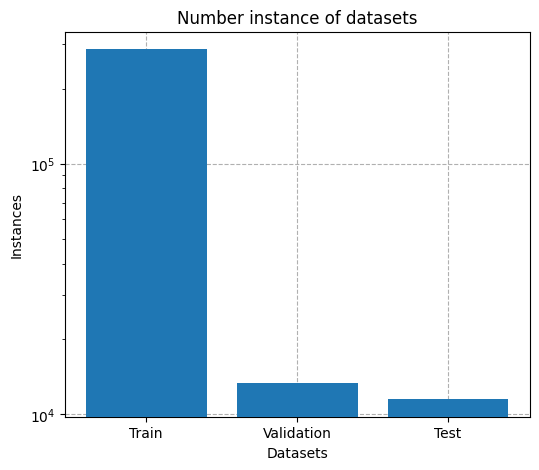

In [7]:
num_instances = {
    "Train": len(train_data),
    "Validation": len(validation_data),
    "Test": len(test_data)
}
plt.figure(figsize=(6,5))
plt.bar(num_instances.keys(), num_instances.values(), zorder=3)
plt.xlabel('Datasets')
plt.ylabel('Instances')
plt.grid(True, linestyle='--', zorder=0)
plt.yscale("log")
plt.title("Number instance of datasets")
plt.show()


In [8]:
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large")

class SummarizationDataset(Dataset):
    def __init__(self, dataframe, article_column="article", summary_column="highlights", max_article_len=1024, max_summary_len=256):
        """
        Dataset cho bài toán tóm tắt văn bản.
        - Tokenize dữ liệu theo batch (giúp tăng tốc).
        - Giới hạn độ dài article và summary để tránh lỗi.
        """
        self.articles = dataframe[article_column].astype(str).tolist()
        self.summaries = dataframe[summary_column].astype(str).tolist()
        self.max_article_len = max_article_len
        self.max_summary_len = max_summary_len

    def __len__(self):
        return len(self.articles)

    def __getitem__(self, idx):
        return self.articles[idx], self.summaries[idx]

def batch_tokenize(batch):
    """
    Hàm xử lý batch dữ liệu:
    - Tokenize articles & summaries theo batch.
    - Truncation để giới hạn độ dài.
    - Trả về số lượng token cho từng bài báo & tóm tắt.
    """
    articles, summaries = zip(*batch)

    article_tokens = tokenizer.batch_encode_plus(
        articles, truncation=True, max_length=1024, padding=False
    )["input_ids"]

    summary_tokens = tokenizer.batch_encode_plus(
        summaries, truncation=True, max_length=256, padding=False
    )["input_ids"]

    article_lengths = torch.tensor([len(t) for t in article_tokens], dtype=torch.long)
    summary_lengths = torch.tensor([len(t) for t in summary_tokens], dtype=torch.long)

    return article_lengths, summary_lengths

# 🔥 Sample 10% dữ liệu để tăng tốc
sample_train = train_data.sample(frac=1, random_state=42)
sample_valid = validation_data.sample(frac=1, random_state=42)
sample_test = test_data.sample(frac=1, random_state=42)

# Tạo dataset
train_dataset = SummarizationDataset(sample_train)
valid_dataset = SummarizationDataset(sample_valid)
test_dataset = SummarizationDataset(sample_test)

# Tạo DataLoader (🔥 Fix lỗi CUDA bằng num_workers=0)
train_loader = DataLoader(train_dataset, batch_size=512, num_workers=0, collate_fn=batch_tokenize)
valid_loader = DataLoader(valid_dataset, batch_size=256, num_workers=0, collate_fn=batch_tokenize)
test_loader = DataLoader(test_dataset, batch_size=256, num_workers=0, collate_fn=batch_tokenize)

# Hàm tính max/min token length
def compute_max_min(loader):
    max_article_len = torch.tensor(0)
    min_article_len = torch.tensor(float("inf"))
    max_summary_len = torch.tensor(0)
    min_summary_len = torch.tensor(float("inf"))

    for article_lengths, summary_lengths in loader:
        max_article_len = torch.max(max_article_len, article_lengths.max())
        min_article_len = torch.min(min_article_len, article_lengths.min())

        max_summary_len = torch.max(max_summary_len, summary_lengths.max())
        min_summary_len = torch.min(min_summary_len, summary_lengths.min())

    return {
        "article": (max_article_len.item(), min_article_len.item()),
        "summary": (max_summary_len.item(), min_summary_len.item())
    }

# 🔥 Chạy tính toán
max_length_instances = {
    "Train": compute_max_min(train_loader),
    "Validation": compute_max_min(valid_loader),
    "Test": compute_max_min(test_loader)
}

print("Max/Min Length (Token Count) for Articles & Summaries:", max_length_instances)


Max/Min Length (Token Count) for Articles & Summaries: {'Train': {'article': (1024, 15.0), 'summary': (256, 7.0)}, 'Validation': {'article': (1024, 50.0), 'summary': (256, 14.0)}, 'Test': {'article': (1024, 66.0), 'summary': (256, 12.0)}}


In [9]:
"""Another way to set check max(can apply for non-transformer model)
max_length_instances = {
    "Train": [
        train_data["article"].astype(str).apply(lambda x: len(x.split())).max(),
        train_data["highlights"].astype(str).apply(lambda x: len(x.split())).max()
    ],
    "Validation": [
        validation_data["article"].astype(str).apply(lambda x: len(x.split())).max(),
        validation_data["highlights"].astype(str).apply(lambda x: len(x.split())).max()
    ],
    "Test": [
        test_data["article"].astype(str).apply(lambda x: len(x.split())).max(),
        test_data["highlights"].astype(str).apply(lambda x: len(x.split())).max()
    ]
}

min_length_instances = {
    "Train": [
        train_data["article"].astype(str).apply(lambda x: len(x.split())).min(),
        train_data["highlights"].astype(str).apply(lambda x: len(x.split())).min()
    ],
    "Validation": [
        validation_data["article"].astype(str).apply(lambda x: len(x.split())).min(),
        validation_data["highlights"].astype(str).apply(lambda x: len(x.split())).min()
    ],
    "Test": [
        test_data["article"].astype(str).apply(lambda x: len(x.split())).min(),
        test_data["highlights"].astype(str).apply(lambda x: len(x.split())).min()
    ]
}
"""


'Another way to set check max(can apply for non-transformer model)\nmax_length_instances = {\n    "Train": [\n        train_data["article"].astype(str).apply(lambda x: len(x.split())).max(),\n        train_data["highlights"].astype(str).apply(lambda x: len(x.split())).max()\n    ],\n    "Validation": [\n        validation_data["article"].astype(str).apply(lambda x: len(x.split())).max(),\n        validation_data["highlights"].astype(str).apply(lambda x: len(x.split())).max()\n    ],\n    "Test": [\n        test_data["article"].astype(str).apply(lambda x: len(x.split())).max(),\n        test_data["highlights"].astype(str).apply(lambda x: len(x.split())).max()\n    ]\n}\n\nmin_length_instances = {\n    "Train": [\n        train_data["article"].astype(str).apply(lambda x: len(x.split())).min(),\n        train_data["highlights"].astype(str).apply(lambda x: len(x.split())).min()\n    ],\n    "Validation": [\n        validation_data["article"].astype(str).apply(lambda x: len(x.split())).min(

In [10]:
x = np.arange(len(max_length_instances))  # Vị trí cột (Train, Validation, Test)
width = 0.4  # Độ rộng cột

plt.figure(figsize=(10, 5))

# Max Article
plt.bar(x - width/2, [v[0] for v in max_length_instances.values()], width, label="Max Article", color="blue")

# Max Highlights
plt.bar(x - width/2, [v[1] for v in max_length_instances.values()], width, label="Max Highlights", color="red", alpha=0.6)

# Cài đặt trục
plt.xticks(x, max_length_instances.keys())  # Train, Validation, Test
plt.xlabel("Dataset")
plt.ylabel("Text Length")
plt.title("Length of Articles and Highlights")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5, zorder=0)

plt.show()


KeyError: 0

<Figure size 1000x500 with 0 Axes>

In [49]:
lengths = train_data["article"].astype(str).apply(len)
print(lengths.describe())  
print("Max length:", lengths.max())  
print("Length of first article:", len(train_data["article"][0]))  
print()
lengths = validation_data["article"].astype(str).apply(len)
print(lengths.describe())  
print("Max length:", lengths.max())  
print("Length of first article:", len(validation_data["article"][0]))  
print()
lengths = validation_data["article"].astype(str).apply(len)
print(lengths.describe())  
print("Max length:", lengths.max())  
print("Length of first article:", len(test_data["article"][0]))  



count    287113.000000
mean       4033.660865
std        1954.339234
min          48.000000
25%        2583.000000
50%        3682.000000
75%        5117.000000
max       15925.000000
Name: article, dtype: float64
Max length: 15925
Length of first article: 1211

count    13368.000000
mean      3923.831912
std       1992.463205
min        245.000000
25%       2404.000000
50%       3523.000000
75%       5041.000000
max      11412.000000
Name: article, dtype: float64
Max length: 11412
Length of first article: 1566

count    13368.000000
mean      3923.831912
std       1992.463205
min        245.000000
25%       2404.000000
50%       3523.000000
75%       5041.000000
max      11412.000000
Name: article, dtype: float64
Max length: 11412
Length of first article: 2126


In [50]:
lengths = train_data["highlights"].astype(str).apply(len)
print(lengths.describe())  
print("Max length:", lengths.max())  
print("Length of first highlights:", len(train_data["highlights"][0]))  
print()
lengths = validation_data["highlights"].astype(str).apply(len)
print(lengths.describe())  
print("Max length:", lengths.max())  
print("Length of first highlights:", len(validation_data["highlights"][0]))  
print()
lengths = validation_data["highlights"].astype(str).apply(len)
print(lengths.describe())  
print("Max length:", lengths.max())  
print("Length of first highlights:", len(test_data["highlights"][0]))  


count    287113.000000
mean        294.770390
std         120.197405
min          14.000000
25%         218.000000
50%         280.000000
75%         342.000000
max        7388.000000
Name: highlights, dtype: float64
Max length: 7388
Length of first highlights: 220

count    13368.000000
mean       328.033513
std        146.304859
min         52.000000
25%        229.000000
50%        299.000000
75%        386.000000
max       8541.000000
Name: highlights, dtype: float64
Max length: 8541
Length of first highlights: 333

count    13368.000000
mean       328.033513
std        146.304859
min         52.000000
25%        229.000000
50%        299.000000
75%        386.000000
max       8541.000000
Name: highlights, dtype: float64
Max length: 8541
Length of first highlights: 213


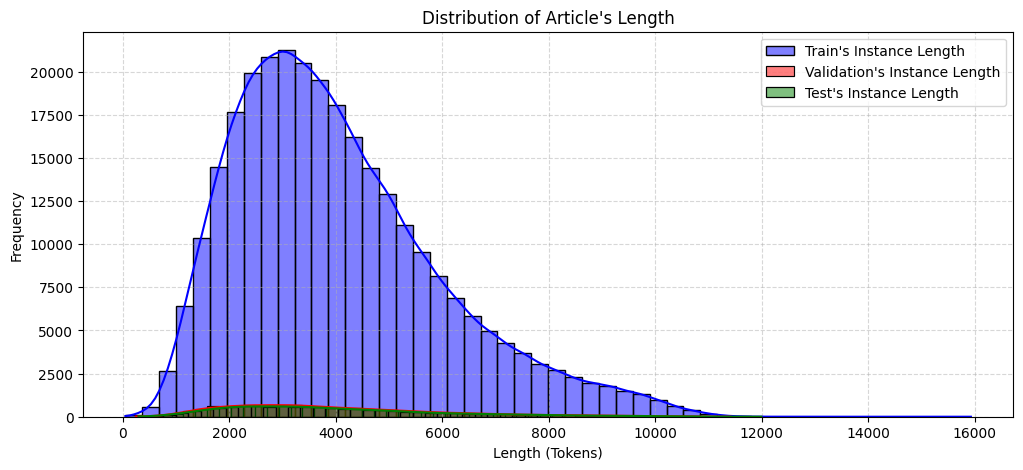

In [73]:
plt.figure(figsize=(12, 5))

# Phân bố độ dài của articles
sns.histplot(train_data["article"].astype(str).apply(len), bins=50, kde=True, color="blue", label="Train's Instance Length")
sns.histplot(validation_data["article"].astype(str).apply(len), bins=50, kde=True, color="red", label="Validation's Instance Length")
sns.histplot(test_data["article"].astype(str).apply(len), bins=50, kde=True, color="green", label="Test's Instance Length")

plt.xlabel("Length (Tokens)")
plt.ylabel("Frequency")
plt.title("Distribution of Article's Length")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5, zorder=0)
plt.show()


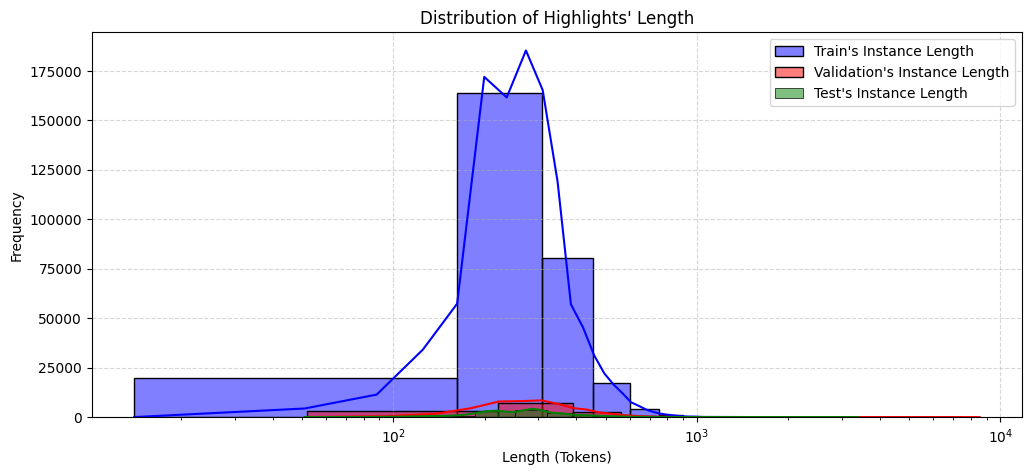

In [74]:
plt.figure(figsize=(12, 5))

# Phân bố độ dài của articles
sns.histplot(train_data["highlights"].astype(str).apply(len), bins=50, kde=True, color="blue", label="Train's Instance Length")
sns.histplot(validation_data["highlights"].astype(str).apply(len), bins=50, kde=True, color="red", label="Validation's Instance Length")
sns.histplot(test_data["highlights"].astype(str).apply(len), bins=50, kde=True, color="green", label="Test's Instance Length")

plt.xlabel("Length (Tokens)")
plt.ylabel("Frequency")
plt.title("Distribution of Highlights' Length")
plt.xscale("log")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5, zorder=0)
plt.show()


In [57]:
set_min_article_len =  500
set_max_article_len =  2000

filtered_train = train_data[
    (train_data["article"].astype(str).apply(len).between(set_min_article_len, set_max_article_len))
]

filtered_validation = validation_data[
    (validation_data["article"].astype(str).apply(len).between(set_min_article_len, set_max_article_len))
]

filtered_test = test_data[
    (test_data["article"].astype(str).apply(len).between(set_min_article_len, set_max_article_len))
]

print("Number of instances before filtering:")
print("Train:", num_instances["Train"])
print("Validation:", num_instances["Validation"])
print("Test:", num_instances["Test"])

print("Number of instances after filtering:")
print("Train:", len(filtered_train))
print("Validation:", len(filtered_validation))
print("Test:", len(filtered_test))  

Number of instances before filtering:
Train: 287113
Validation: 13368
Test: 11490
Number of instances after filtering:
Train: 36881
Validation: 2155
Test: 1787
